(60000, 28, 28)
(10000, 28, 28)
[5923, 6742, 5958, 6131, 5842, 5421, 5918, 6265, 5851, 5949]


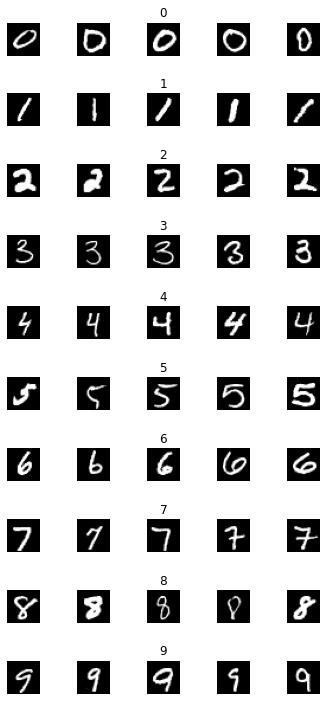

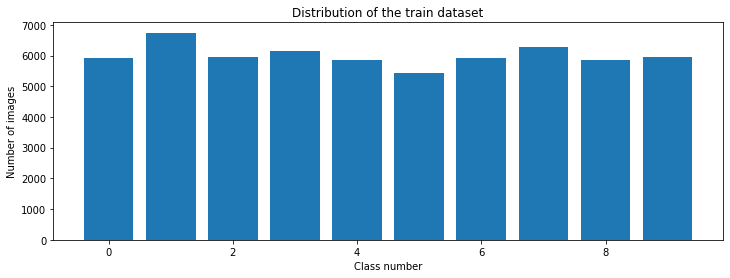

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.optimizers import Adam
from keras.utils.np_utils import to_categorical
from keras.layers import Dropout
from keras.models import Model
import random


np.random.seed(0)




(X_train, y_train), (X_test, y_test)= mnist.load_data()

print(X_train.shape)
print(X_test.shape)
assert(X_train.shape[0] == y_train.shape[0]), "The number of images is not equal to the number of labels."
assert(X_train.shape[1:] == (28,28)), "The dimensions of the images are not 28 x 28."
assert(X_test.shape[0] == y_test.shape[0]), "The number of images is not equal to the number of labels."
assert(X_test.shape[1:] == (28,28)), "The dimensions of the images are not 28 x 28."

num_of_samples=[]
 
cols = 5
num_classes = 10

fig, axs = plt.subplots(nrows=num_classes, ncols=cols, figsize=(5,10))
fig.tight_layout()

for i in range(cols):
    for j in range(num_classes):
      x_selected = X_train[y_train == j]
      axs[j][i].imshow(x_selected[random.randint(0,(len(x_selected) - 1)), :, :], cmap=plt.get_cmap('gray'))
      axs[j][i].axis("off")
      if i == 2:
        axs[j][i].set_title(str(j))
        num_of_samples.append(len(x_selected))




print(num_of_samples)
plt.figure(figsize=(12, 4))
plt.bar(range(0, num_classes), num_of_samples)
plt.title("Distribution of the train dataset")
plt.xlabel("Class number")
plt.ylabel("Number of images")
plt.show()



X_train = X_train.reshape(60000, 28, 28, 1)
X_test = X_test.reshape(10000, 28, 28, 1)


y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

X_train = X_train/255
X_test = X_test/255


In [2]:
# # LEnet based model function (padding can be valid,casual , same)
# def lenet_model():
#   # create the model
#   model = Sequential()
#   # add convolution layer 1
#   model.add(Conv2D(30, (5, 5), input_shape=(28,28,1), activation='relu', strides=1))
#   # add pooling layer 1
#   model.add(MaxPooling2D(pool_size=(2,2)))
#   # add convolution layer 2
#   model.add(Conv2D(15, (3,3), activation = 'relu', strides=1))
#   # add pooling layer 2
#   model.add(MaxPooling2D(pool_size=(2,2)))
#   # flatten
#   model.add(Flatten())
#   # add hidden 1
#   model.add(Dense(500, activation='relu'))
#   # add hidden 2
#   #model.add(Dense(300, activation='relu'))
#   # add dropout layer , drops or shuts down nodes to decrease overfitting and generalisation error
#   model.add(Dropout(0.5))
#   # output layer 
#   model.add(Dense(num_classes, activation='softmax'))
#   # compiling the model
#   model.compile(Adam(lr=0.01), loss='categorical_crossentropy', metrics=['accuracy'])
#   return model

  # Custom model function (padding can be valid,casual , same)
def Custom_model():
  # create the model
  model = Sequential()
  # add convolution layer 1
  model.add(Conv2D(64, (2, 2), input_shape=(28,28,1), activation='relu', strides=1))
  # add pooling layer 1
  model.add(MaxPooling2D(pool_size=(2,2)))
  # add dropout layer 1 , drops or shuts down nodes to decrease overfitting and generalisation error
  model.add(Dropout(0.25))
  # add convolution layer 2
  model.add(Conv2D(64, (2, 2), activation='relu', strides=1))
  # add pooling layer 2
  model.add(MaxPooling2D(pool_size=(2,2)))
  # add dropout layer 2 , drops or shuts down nodes to decrease overfitting and generalisation error
  model.add(Dropout(0.25))
  # add convolution layer 3
  model.add(Conv2D(64, (2, 2), activation='relu', strides=1))
  # add dropout layer 3 , drops or shuts down nodes to decrease overfitting and generalisation error
  model.add(Dropout(0.25))

  # add hidden 1
  model.add(Dense(64, activation='relu'))
  # add dropout layer , drops or shuts down nodes to decrease overfitting and generalisation error
  model.add(Dropout(0.25))
    # flatten
  model.add(Flatten())
  # output layer 
  model.add(Dense(num_classes, activation='softmax'))
  # compiling the model
  model.compile(Adam(lr=0.001), loss='categorical_crossentropy', metrics=['accuracy'])
  return model

In [3]:
# model = lenet_model()
model = Custom_model()
print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 27, 27, 64)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 13, 13, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 12, 12, 64)        16448     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 5, 5, 64)          1

In [4]:
# history
# history = model.fit(X_train, y_train, epochs=30, validation_split=0.1, batch_size=400, verbose=1, shuffle=1)
history = model.fit(X_train, y_train, epochs=50, validation_split=0.1, batch_size=400, verbose=1, shuffle=1)

Epoch 1/50
135/135 [==============================] - 4s 16ms/step - loss: 1.2839 - accuracy: 0.5717 - val_loss: 0.1585 - val_accuracy: 0.9540
Epoch 2/50
135/135 [==============================] - 2s 13ms/step - loss: 0.2258 - accuracy: 0.9287 - val_loss: 0.0848 - val_accuracy: 0.9788
Epoch 3/50
135/135 [==============================] - 2s 13ms/step - loss: 0.1417 - accuracy: 0.9561 - val_loss: 0.0677 - val_accuracy: 0.9827
Epoch 4/50
135/135 [==============================] - 2s 13ms/step - loss: 0.1059 - accuracy: 0.9666 - val_loss: 0.0598 - val_accuracy: 0.9843
Epoch 5/50
135/135 [==============================] - 2s 13ms/step - loss: 0.0913 - accuracy: 0.9709 - val_loss: 0.0517 - val_accuracy: 0.9860
Epoch 6/50
135/135 [==============================] - 2s 13ms/step - loss: 0.0841 - accuracy: 0.9731 - val_loss: 0.0470 - val_accuracy: 0.9865
Epoch 7/50
135/135 [==============================] - 2s 13ms/step - loss: 0.0708 - accuracy: 0.9772 - val_loss: 0.0438 - val_accuracy: 0.9868

Text(0.5, 0, 'epoch')

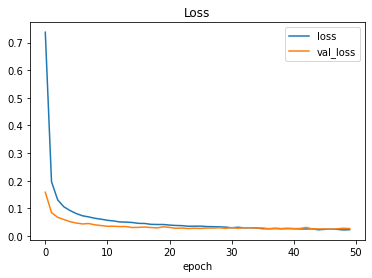

In [5]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['loss', 'val_loss'])
plt.title('Loss')
plt.xlabel('epoch')


Text(0.5, 0, 'epoch')

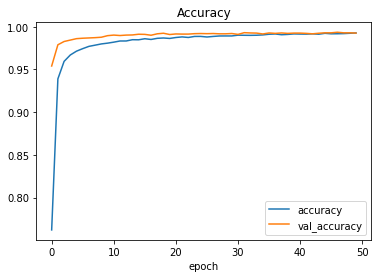

In [6]:

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['accuracy', 'val_accuracy'])
plt.title('Accuracy')
plt.xlabel('epoch')

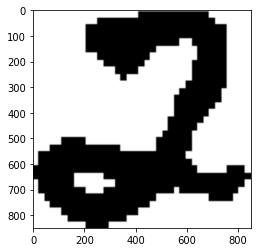

In [7]:
# random image predicition
import requests
from PIL import Image
url1='https://www.researchgate.net/profile/Jose_Sempere/publication/221258631/figure/fig1/AS:305526891139075@1449854695342/Handwritten-digit-2.png'
url = 'https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcST8KzXHtkSHcxzdpnllMhAj0upLEwnNFdtY6j4YUPcmaf4Ty3u'
response = requests.get(url1, stream=True)
img = Image.open(response.raw)
plt.imshow(img, cmap=plt.get_cmap('gray'))

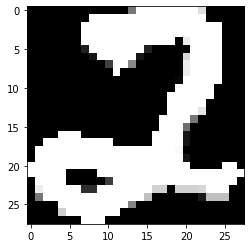

In [8]:
import cv2

img = np.asarray(img)
img = cv2.resize(img, (28, 28))
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
img = cv2.bitwise_not(img)
plt.imshow(img, cmap=plt.get_cmap('gray'))


In [9]:
img = img/255
img = img.reshape(1, 28, 28, 1)

prediction = model.predict_classes(img)
print("predicted digit:", str(prediction))


predicted digit: [2]


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


In [10]:
# testing
score = model.evaluate(X_test, y_test, verbose=0)
print(type(score))
print('Test score:', score[0])
print('Test accuracy:', score[1])


<class 'list'>
Test score: 0.02327410690486431
Test accuracy: 0.9918000102043152


In [11]:
# model of keras lets us use sections from previously trained model
layer1 = Model(inputs=model.layers[0].input,outputs=model.layers[0].output)
layer2 = Model(inputs=model.layers[0].input,outputs=model.layers[2].output)

visual_layer1, visual_layer2 = layer1.predict(img) , layer2.predict(img)
print(visual_layer1.shape)
print(visual_layer2.shape)

(1, 27, 27, 64)
(1, 13, 13, 64)


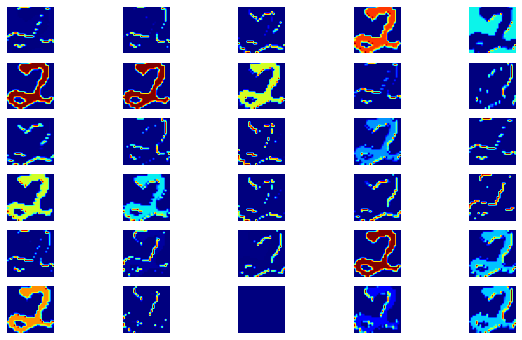

In [12]:
# outputs of the first convolution layer in terms of feature maps
plt.figure(figsize=(10,6))
for i in range(30):
  plt.subplot(6,5, i+1)
  plt.imshow(visual_layer1[0,:,:, i], cmap=plt.get_cmap('jet'))
  plt.axis('off')
  

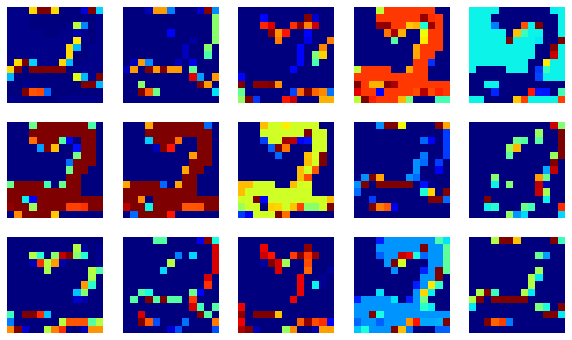

In [13]:
# outputs of the 2nd convolution laye in term of feature maps
plt.figure(figsize=(10,6))
for i in range(15):
  plt.subplot(3,5, i+1)
  plt.imshow(visual_layer2[0,:,:, i], cmap=plt.get_cmap('jet'))
  plt.axis('off')



In [15]:
model.save('model.h5')
from google.colab import files
files.download('model.h5')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>